In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print(f'train文件的形状为：{train.shape}')
print('')
print(f'train中缺失值的列名为：{train.columns[train.isna().any()].tolist()}')
print('')
print(f'train中的缺失值数量为：')
print(train.isna().sum().sort_values(ascending=False))
print('')
print(f'test中的缺失值数量为：')
print(test.isna().sum().sort_values(ascending=False))


train文件的形状为：(891, 12)

train中缺失值的列名为：['Age', 'Cabin', 'Embarked']

train中的缺失值数量为：
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

test中的缺失值数量为：
Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


In [5]:
# 总体数据有891条，我们可以删除train中的Embarked缺失值行
# 对于test中的数据，我们可以删除test中的Fare缺失值行

train.drop(train.loc[train['Embarked'].isna(),'Embarked'].index,axis=0,inplace=True)
test.drop(test.loc[test['Fare'].isna(),'Fare'].index,axis=0,inplace=True)

In [6]:
# 查看现在的缺失值个数
print(f'train中缺失值个数：')
print(train.isna().sum().sort_values(ascending=False))
print('')
print(f'test中的缺失值个数：')
print(test.isna().sum().sort_values(ascending=False))

train中缺失值个数：
Cabin          687
Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

test中的缺失值个数：
Cabin          326
Age             86
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [7]:
print(f'train中的列名：{train.columns.tolist()}')
print('')
print(f'test中的列名：{test.columns.tolist()}')

train中的列名：['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

test中的列名：['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [8]:
train_dropS=train.drop('Survived',axis=1,inplace=True)
# 将train与test合并，一起处理缺失值
data=pd.concat([train,test])
# PassengerId单纯计数的，故删除
data.drop('PassengerId',axis=1,inplace=True)
# 将名字删除，因为没办法提取有用信息，故先删除(提取的是Surname)
data.drop('Name',axis=1,inplace=True)

In [9]:
data.nunique()

Pclass        3
Sex           2
Age          97
SibSp         7
Parch         8
Ticket      927
Fare        280
Cabin       185
Embarked      3
dtype: int64

In [10]:
data[['Pclass','SibSp','Parch','Embarked']].head(10)

,Pclass,SibSp,Parch,Embarked
0,3,1,0,S
1,1,1,0,C
2,3,0,0,S
3,1,1,0,S
4,3,0,0,S
5,3,0,0,Q
6,1,0,0,S
7,3,3,1,S
8,3,0,2,S
9,2,1,0,C


In [11]:
# 将分类变量转化成数值型变量

# 男1女0
data['Sex']=(data['Sex']=='male').astype(int)
# Pclass、SibSp、Parch都已经是数值型变量，无需转化；Embarked包含3个不同的类别，先不处理

In [12]:
# 查看data中目前的缺失值个数
data.isna().sum().sort_values(ascending=False)

Cabin       1013
Age          263
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<center>数据总览</center>

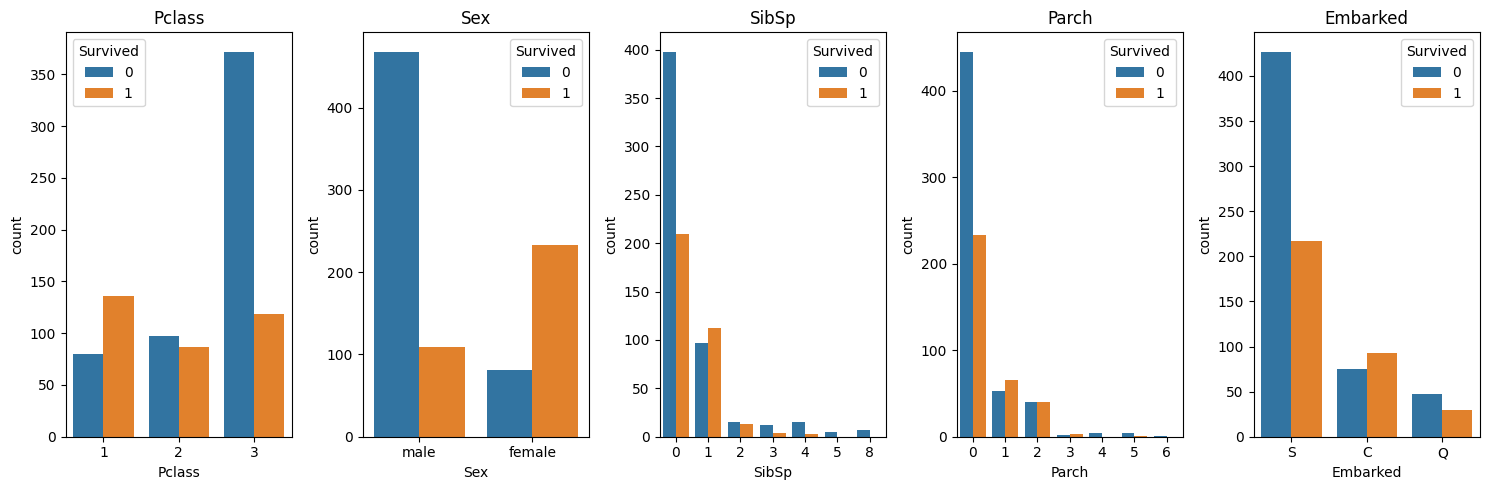

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
X=pd.read_csv('train.csv')
cols=['Pclass','Sex','SibSp','Parch','Embarked']
fig=plt.figure(figsize=(15,5))
for i,col in enumerate(cols):
               ax=fig.add_subplot(1,5,i+1)
               sns.countplot(data=X,x=col,axes=ax,hue='Survived')
               ax.set_title(col)
fig.tight_layout()


&emsp;&emsp;从死亡角度来看，Pclass=3、男性、SibSP=0、Parch=0以及Embarked=S的乘客死亡率最高

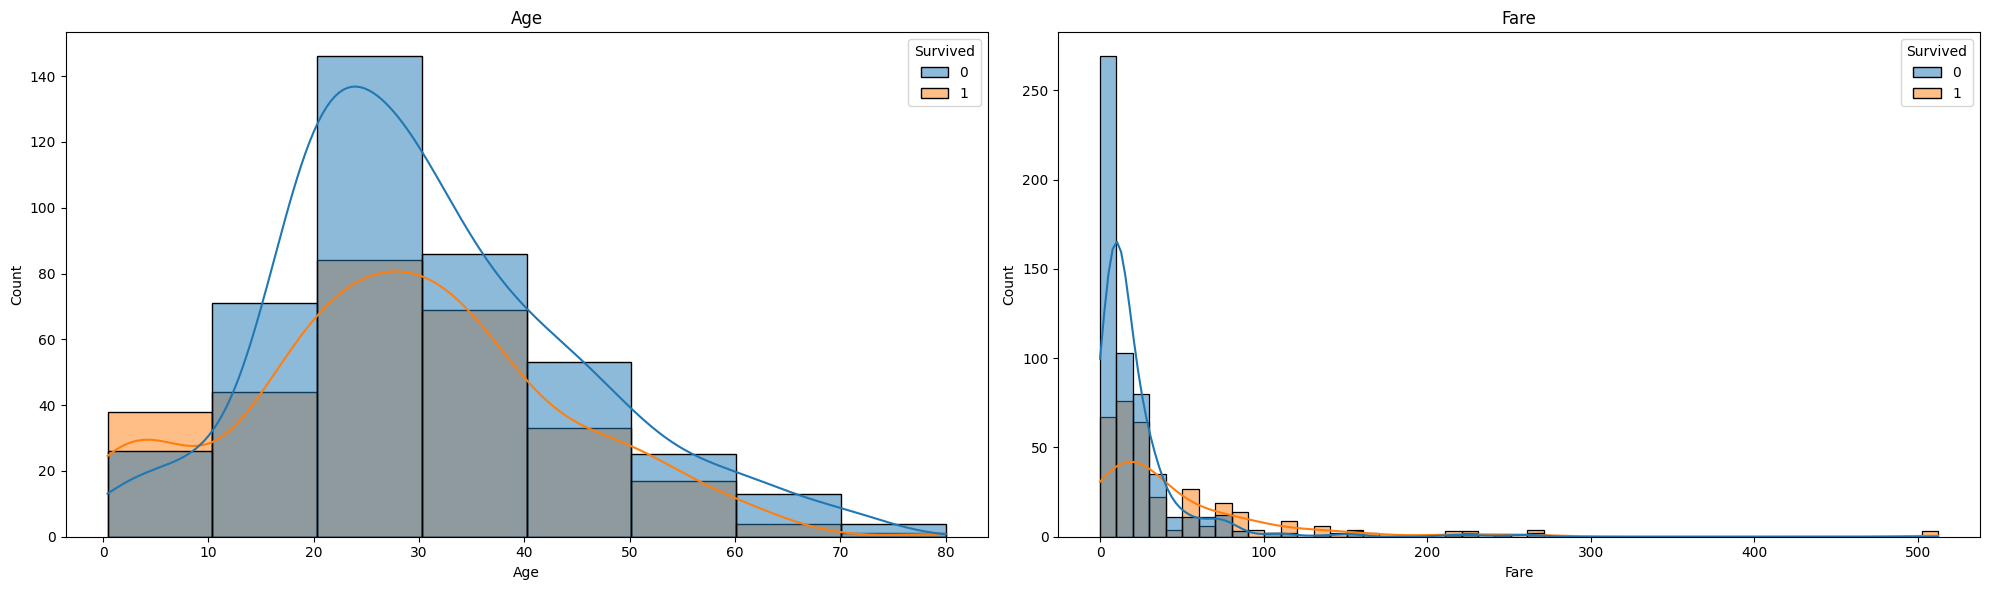

In [14]:
cols_num=['Age','Fare']
fig=plt.figure(figsize=(20,6))
for i,col in enumerate(cols_num):
               ax=fig.add_subplot(1,2,i+1)
               sns.histplot(data=X,x=col,kde=True,hue='Survived',binwidth=10)
               ax.set_title(col)
fig.tight_layout()

&emsp;&emsp;年龄在0~10岁的乘客存活率高，票价在0~30的死亡率很高

In [15]:
# 先处理Age
# Age是连续性变量，并且伴随着大量的缺失值，我们需要用新的一个变量去替换他

X['Age0-10']=((X['Age']>0)&(X['Age']<=10)).astype(int)
X['Age11-20']=((X['Age']>10)&(X['Age']<=20)).astype(int)
X['Age21-30']=((X['Age']>20)&(X['Age']<=30)).astype(int)
X['Age31-40']=((X['Age']>30)&(X['Age']<=40)).astype(int)
X['Age41-50']=((X['Age']>40)&(X['Age']<=50)).astype(int)
X['Age51-60']=((X['Age']>50)&(X['Age']<=60)).astype(int)
X['Age61-70']=((X['Age']>60)&(X['Age']<=70)).astype(int)
X['Age71-80']=((X['Age']>70)&(X['Age']<=80)).astype(int)

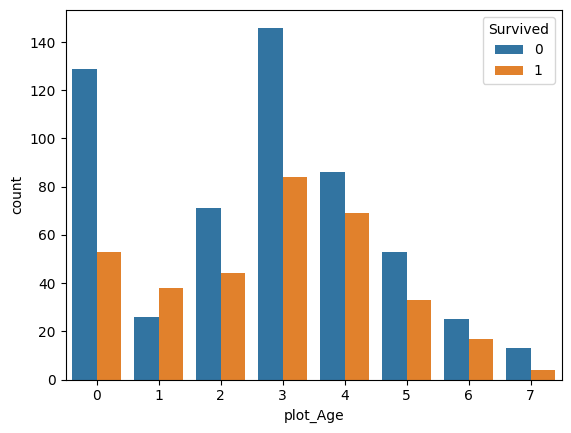

In [16]:
X['plot_Age']=X['Age0-10']+2*X['Age11-20']+3*X['Age21-30']+4*X['Age31-40']+5*X['Age41-50']+6*X['Age51-60']+7*X['Age61-70']
sns.countplot(data=X,x='plot_Age',hue='Survived')
X.drop('plot_Age',axis=1,inplace=True)